# Deteksi Berita Palsu Menggunakan Naive Bayes

## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import *
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## 2. Load Data

In [2]:
df = pd.read_csv("data/news.csv")
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


## 3. Preprocessing (Mencari apakah ada kolom yang kosong)

In [3]:
print("teks yang kosong ada",df.text.isnull().sum())
print("label yang kosong ada",df.label.isnull().sum())

teks yang kosong ada 0
label yang kosong ada 0


## 4. Preprocessing (Mendapatkan kolom text dan label serta mengubah real = 0 dan fake = 1)

In [4]:
teks = df.text
teks

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6335, dtype: object

In [5]:
def ubah_label(label):
    if label=="REAL":
        return 0
    else:
        return 1
labels = df.label.apply(lambda x : ubah_label(x))

In [6]:
labels

0       1
1       1
2       0
3       1
4       0
       ..
6330    0
6331    1
6332    1
6333    0
6334    0
Name: label, Length: 6335, dtype: int64

## 5. Preprocessing (Case Folding)

In [7]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.stem.snowball import SnowballStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
def case_folding(txt):
    pattern = r'[^a-zA-Z\s]'
    text = re.sub(pattern,'',txt)
    return text

## 6. Preprocessing (Tokenizing dan Stemming)

In [9]:
def token_stem(txt):
    token_words = word_tokenize(txt)
    stem_sentence = []
    for word in token_words:
        english_stem = SnowballStemmer("english")
        stem_sentence.append(english_stem.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

## 7. Preprocessing (Menghapus stopwords)

In [10]:
def hapus_stopword(txt):
    stop_words=stopwords.words('english')
    return " ".join([w.lower() for w in txt.split() if w.lower() not in stop_words and len(w)>1])

## 8. Hasil Text Preprocessing

In [11]:
final_text = teks.apply(case_folding).apply(hapus_stopword).apply(token_stem)

## 9. Ekstraksi Fitur dengan TFIDF

In [12]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(final_text).toarray()

In [13]:
X = X[:,:40000]

## 10. Membagi data train dan data test

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,labels,test_size=0.2)

## 11. Model Naive Bayes

In [15]:
model = BernoulliNB()
model.fit(X_train, Y_train)

BernoulliNB()

In [16]:
y_pred = model.predict(X_test)
acc = accuracy_score(Y_test,y_pred)
pre = precision_score(Y_test,y_pred)
recall = recall_score(Y_test,y_pred)
f1 = f1_score(Y_test,y_pred)

In [17]:
print('Accuracy : %.4f' %acc)
print('Precision : %.4f' %pre)
print('Recall : %.4f' %recall)
print('F1 : %.4f' %f1)

Accuracy : 0.7924
Precision : 0.7493
Recall : 0.8643
F1 : 0.8027


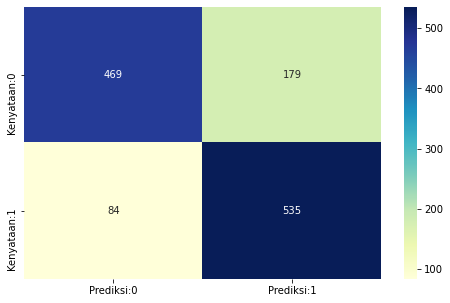

In [18]:
cm=confusion_matrix(Y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Prediksi:0','Prediksi:1'],index=['Kenyataan:0','Kenyataan:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");